In [1011]:
# Importing dependencies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import scipy

sns.set_theme(style='white',font_scale=1, palette='deep')

In [1870]:
# Importing and viewing the dataset 
df = pd.read_csv('penguins_lter.csv')
df.head()
target = 'Species'

In [1871]:
# Checking the types of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [1872]:
# Adjusting the column names 
column_names = ['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'ID', 'Clutch Completion', 'Date Egg', 'Culmen Length',
       'Culmen Depth', 'Flipper Length', 'Body Mass', 'Sex',
       'Delta 15 N', 'Delta 13 C', 'Comments']

df.columns = column_names

In [1873]:
# Remove Sample Number 
df.drop('Sample Number', axis = 1, inplace = True)

In [1874]:
# Number/Proportion of missing values 
index_count = 0
for x in df: 
    print(f'{x}: {df.iloc[:,index_count].isnull().sum()} missing values, {round((df.isnull().sum()/df.shape[0])*100,2)[index_count]} %')
    index_count += 1

studyName: 0 missing values, 0.0 %
Species: 0 missing values, 0.0 %
Region: 0 missing values, 0.0 %
Island: 0 missing values, 0.0 %
Stage: 0 missing values, 0.0 %
ID: 0 missing values, 0.0 %
Clutch Completion: 0 missing values, 0.0 %
Date Egg: 0 missing values, 0.0 %
Culmen Length: 2 missing values, 0.58 %
Culmen Depth: 2 missing values, 0.58 %
Flipper Length: 2 missing values, 0.58 %
Body Mass: 2 missing values, 0.58 %
Sex: 10 missing values, 2.91 %
Delta 15 N: 14 missing values, 4.07 %
Delta 13 C: 13 missing values, 3.78 %
Comments: 318 missing values, 92.44 %


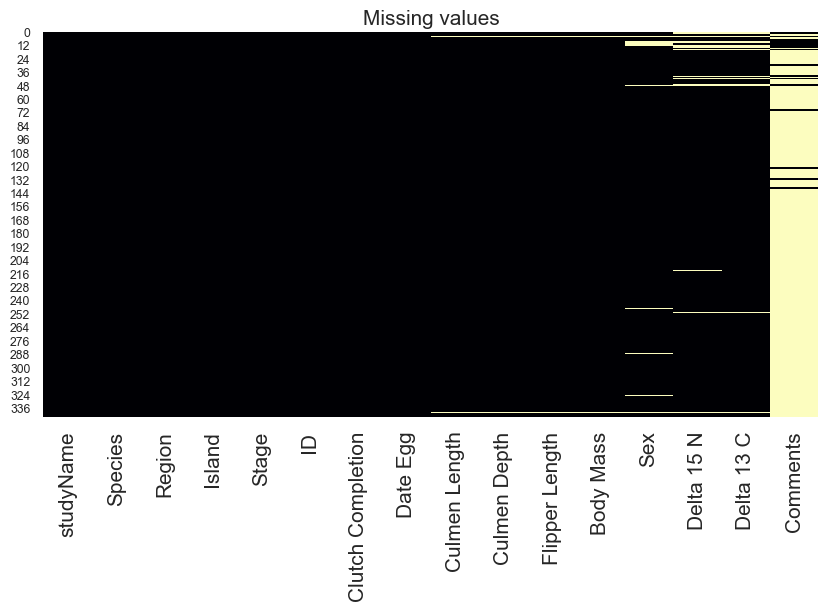

In [1875]:
# Visualising the missing values 
plt.figure(figsize = (10,5))
g = sns.heatmap(df.isnull(), cmap='magma', cbar=False)
g.set_title('Missing values', fontsize = 15)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 15)
plt.grid()
plt.show()

In [1876]:
# Computing/Removing missing values
numerics = list(df.select_dtypes('number'))
objects = list(df.select_dtypes('object'))

removal_thershold = 0.75
compute_thershold = 0.02

for x in df: 
    if round(df[x].isnull().sum()/df.shape[0]) > removal_thershold: 
          df.drop(x, axis = 1, inplace = True)
    elif x in numerics and df[x].isnull().sum()/df.shape[0] > compute_thershold:
          df[x].fillna(df[x].mean(), inplace = True)    
    elif x in objects and df[x].isnull().sum()/df.shape[0] > compute_thershold:
          df[x].fillna('U', inplace = True) 
    elif x in numerics and  df[x].isnull().sum()/df.shape[0] > 0 < compute_thershold:
          df[x].fillna(df[x].median(), inplace = True)    
print(f'Missing Values: \n{df.isnull().sum()}')                      

Missing Values: 
studyName            0
Species              0
Region               0
Island               0
Stage                0
ID                   0
Clutch Completion    0
Date Egg             0
Culmen Length        0
Culmen Depth         0
Flipper Length       0
Body Mass            0
Sex                  0
Delta 15 N           0
Delta 13 C           0
dtype: int64


In [1877]:
# Looking at the number of unique values 
for x in df:
   print(f'{x} has {df[x].nunique()} unique values')

studyName has 3 unique values
Species has 3 unique values
Region has 1 unique values
Island has 3 unique values
Stage has 1 unique values
ID has 190 unique values
Clutch Completion has 2 unique values
Date Egg has 50 unique values
Culmen Length has 165 unique values
Culmen Depth has 80 unique values
Flipper Length has 55 unique values
Body Mass has 94 unique values
Sex has 4 unique values
Delta 15 N has 331 unique values
Delta 13 C has 332 unique values


In [1878]:
# Removing features that have one unique value 
cols_to_drop = pd.DataFrame(df.nunique()) 
cols_to_drop = cols_to_drop.loc[cols_to_drop.values == 1].T.columns
print(f'Columns Removed Are: {list(cols_to_drop)}')
df.drop(list(cols_to_drop), axis=1, inplace=True)

Columns Removed Are: ['Region', 'Stage']


In [1879]:
# Removing features with length of unique value equal number of observations 
len_before = len(df.columns)
removed_features = []

for x in df:
     if len(df[x].unique()) == df.shape[0]:
            removed_features.append(x)
            df.drop(x, axis = 1,inplace = True)
        
len_after  = len(df.columns)
print(f'No. of features removed {len_before - len_after}. \nFeatures Removed: {removed_features}')

No. of features removed 0. 
Features Removed: []


In [1880]:
# Cleaning up text values - abbreviating
# Species 

old_species_list = list(df[target].unique())
new_species_list = []
for ind, value in enumerate(df[target].unique()): 
         new_species_list.append(df[target].unique()[ind].split()[0])
         
                    
df[target].replace(old_species_list, new_species_list, inplace=True)
df[target].unique()
    

# Studyname
studyold = []
studynew = []

for x in df['studyName'].unique(): 
    studyold.append(x)

for x in df['studyName'].unique(): 
    studynew.append(x[0] + x[3:5])
    
df['studyName'].replace(studyold, studynew, inplace=True)

In [1881]:
# Dataset characteristics
print(f'Dataset characteristics: \nNumber of observations: {df.shape[0]} \nNumber of features: {df.shape[1]}')

Dataset characteristics: 
Number of observations: 344 
Number of features: 13


In [1882]:
# Calculating the the percentage: number of features to number of observations
print(f'The % number of features to observations: {round(df.shape[1]/df.shape[0]*100,2)}%')

The % number of features to observations: 3.78%


In [1883]:
# Describing the numeric data - determining outliers
percentiles = [.2,.4, .6, .8]
round(df.describe(percentiles, include = ['float']).T,2)

,count,mean,std,min,20%,40%,50%,60%,80%,max
Culmen Length,344.0,43.93,5.44,32.10,38.42,42.00,44.45,45.98,49.34,59.60
Culmen Depth,344.0,17.15,1.97,13.10,15.00,16.82,17.30,17.90,18.90,21.50
Flipper Length,344.0,200.89,14.02,172.00,188.00,194.00,197.00,202.80,215.00,231.00
Body Mass,344.0,4200.87,799.70,2700.00,3475.00,3800.00,4050.00,4300.00,4950.00,6300.00
Delta 15 N,344.0,8.73,0.54,7.63,8.25,8.54,8.69,8.83,9.24,10.03
Delta 13 C,344.0,-25.69,0.78,-27.02,-26.41,-26.07,-25.79,-25.52,-24.86,-23.79


In [1884]:
# Describing object types 
objects = df.select_dtypes('object')
for x in objects: 
    print(f'{x}: \n{df[x].describe()}')
    print('\n')

studyName: 
count     344
unique      3
top       P09
freq      120
Name: studyName, dtype: object


Species: 
count        344
unique         3
top       Adelie
freq         152
Name: Species, dtype: object


Island: 
count        344
unique         3
top       Biscoe
freq         168
Name: Island, dtype: object


ID: 
count       344
unique      190
top       N32A2
freq          3
Name: ID, dtype: object


Clutch Completion: 
count     344
unique      2
top       Yes
freq      308
Name: Clutch Completion, dtype: object


Date Egg: 
count          344
unique          50
top       11/27/07
freq            18
Name: Date Egg, dtype: object


Sex: 
count      344
unique       4
top       MALE
freq       168
Name: Sex, dtype: object




In [1885]:
# Creating month, Year, day Columns 
df['Date Egg'] = pd.to_datetime(df['Date Egg'])

df['Egg Year'] = df['Date Egg'].apply(lambda time: time.year)
df['Egg Month'] = df['Date Egg'].apply(lambda time: time.month)
df['Egg Day'] = df['Date Egg'].apply(lambda time: time.day)

df.drop('Date Egg', axis = 1, inplace = True)

In [1886]:
# Checking for duplicated records 
print(f'Number of duplicated records: {df.duplicated().sum()}')

Number of duplicated records: 0


Adelie Observation No. 152,    % balance: 44.19%
Chinstrap Observation No. 124,    % balance: 36.05%
Gentoo Observation No. 68,    % balance: 19.77%




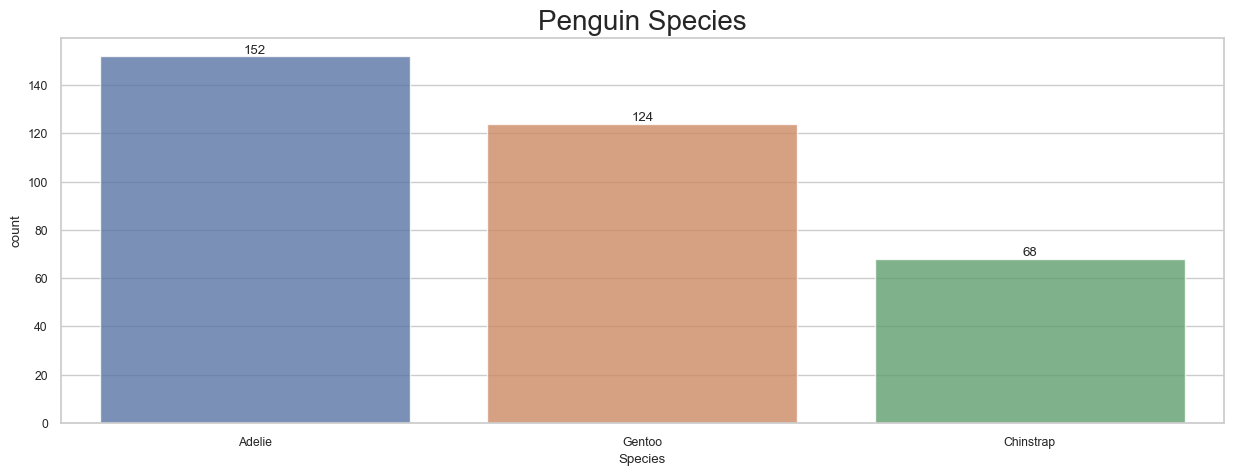

In [1887]:
# Determining balance in target feature 
target = 'Species'

for ind, value in enumerate(df[target].value_counts()):
        print(f'{df[target].unique()[ind]} Observation No. {value},    % balance: {round(value/(df[target].shape[0])*100,2)}%')
 

print('\n')
plt.figure(figsize = (15,5))        
g = sns.countplot(data = df, x = target, order=df[target].value_counts(ascending=False).index, alpha = 0.8)
ab_val = df[target].value_counts(ascending=False).values
g.bar_label(container=g.containers[0], labels=ab_val)
plt.tight_layout
plt.title('Penguin Species', fontsize = 20)
plt.show()

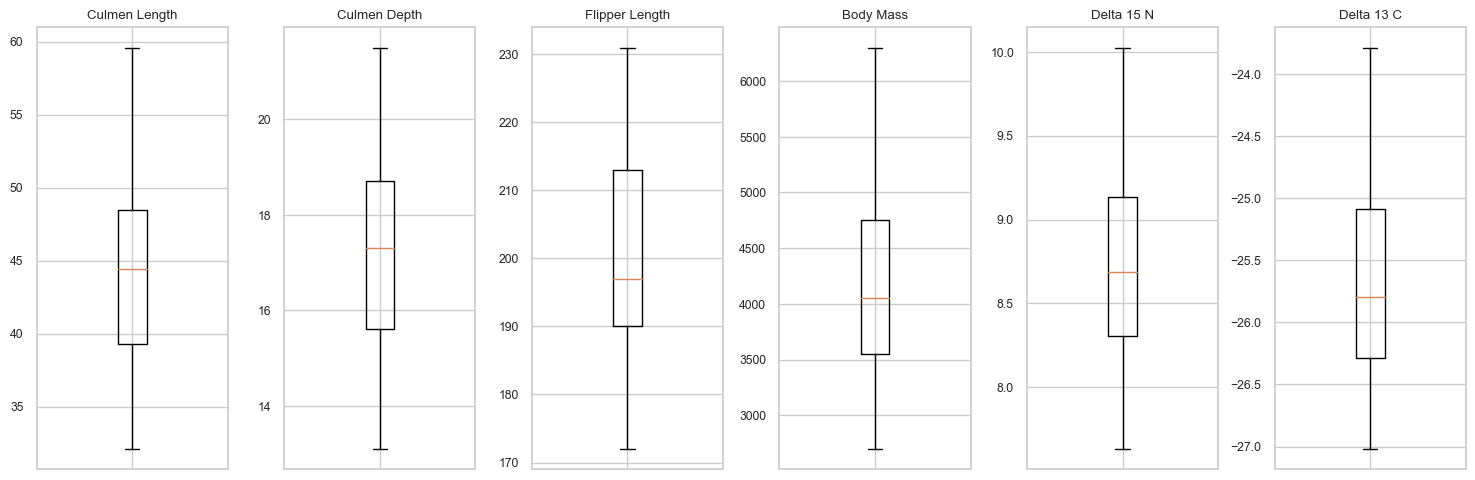

In [1888]:
# Outliers
fig,axs = plt.subplots(ncols = len(numerics), figsize = (15,5))
plt.tight_layout()
for index, x in enumerate(numerics): 
    axs[index].boxplot(df[x])
    axs[index].title.set_text(x)
    axs[index].set(xlabel = None)
    axs[index].set(xticklabels = [])

## Analysing Relationship between Features and Target

In [1889]:
# Computing correlation between Species and numerical variables 
# Encoding the target variable 
from sklearn.preprocessing import LabelEncoder
encoded_target = pd.DataFrame({'target':LabelEncoder().fit_transform(df[target])})

# Computing correlation
correlation = []

for x in numerics: 
    correlation.append(round(df[x].corr(encoded_target['target']),2))
    
print(f'Penguin Species Correlation with Numeric Features:')    
num_tar = pd.DataFrame(np.array(correlation).reshape(-1, 6), columns=numerics, index = [target]).T.sort_values(by = 'Species', ascending = False)
num_tar

Penguin Species Correlation with Numeric Features:


,Species
Flipper Length,0.85
Body Mass,0.75
Culmen Length,0.73
Delta 13 C,-0.19
Delta 15 N,-0.47
Culmen Depth,-0.74


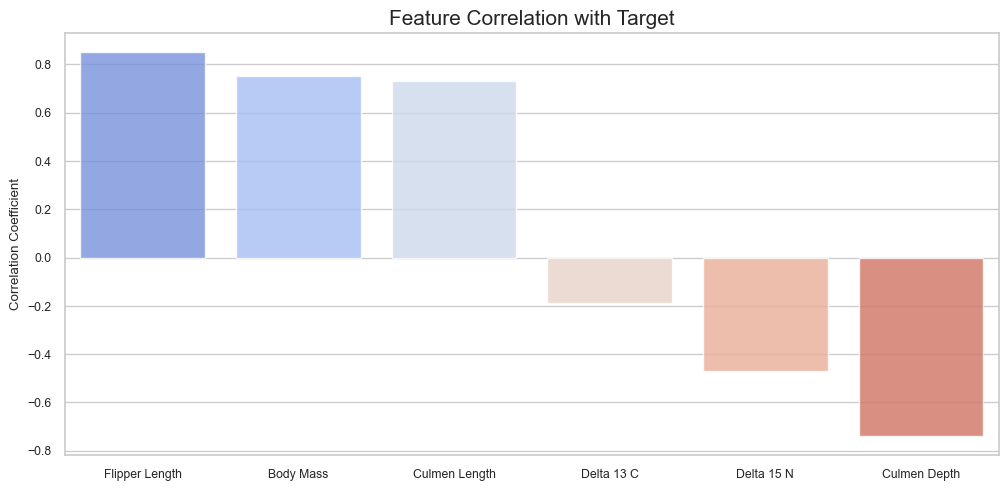

In [1890]:
# Visualising correlations  (numeric w target)
plt.figure(figsize=(10,5))
sns.set(font_scale = 0.8, style = 'whitegrid')
sns.barplot(num_tar.T, alpha = 0.8, palette='coolwarm')
plt.title('Feature Correlation with Target', fontsize = 15)
plt.tight_layout()
plt.ylabel('Correlation Coefficient')
plt.show()

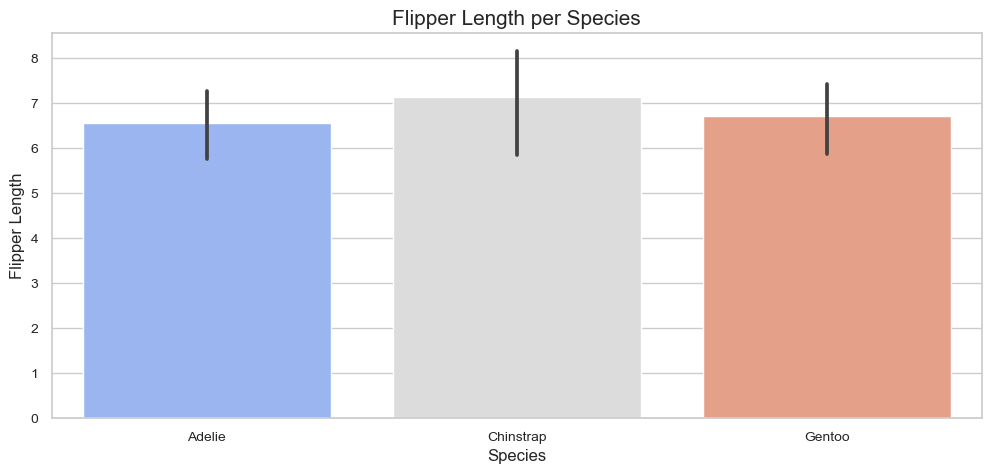

In [1891]:
# Flipper Length and Species 
import warnings
warnings.filterwarnings('ignore')

contin_feature = 'Flipper Length'
plt.figure(figsize = (12,5))
g = sns.barplot(df, x = target, y = contin_feature, estimator='std', palette = 'coolwarm')
plt.title('Flipper Length per Species', fontsize = 15)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 10)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 10)
plt.xlabel(target, fontsize = 12)
plt.ylabel(contin_feature, fontsize = 12)
plt.show()

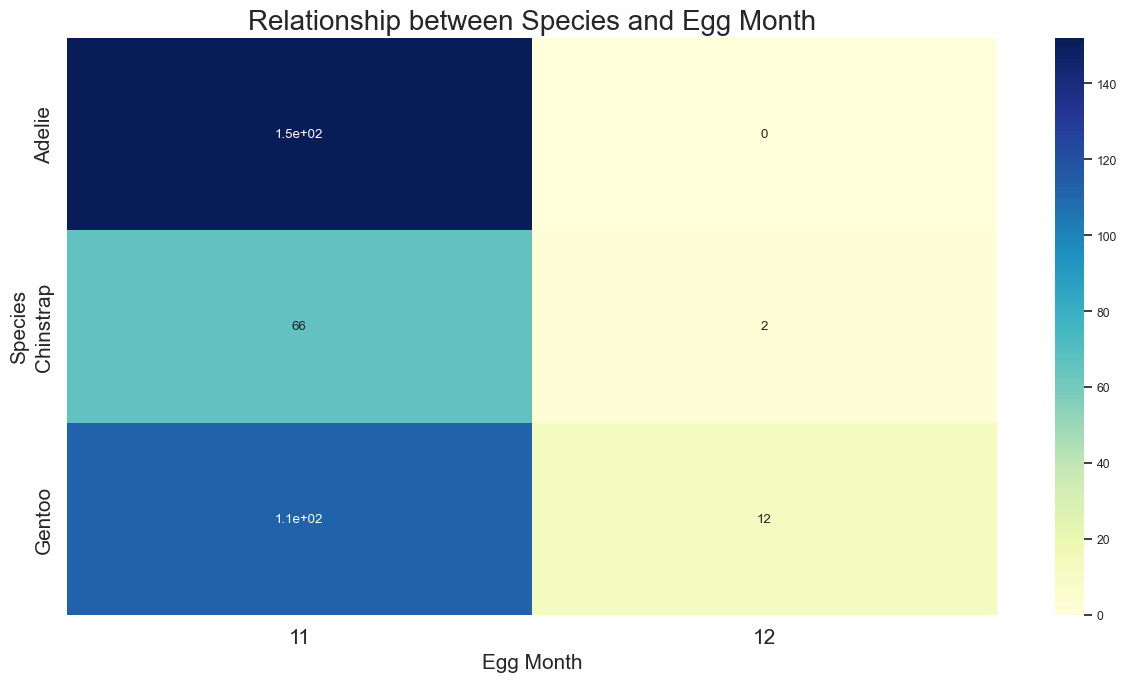

In [1892]:
# Egg Month and Species
plt.figure(figsize = (15,7.5))
g = sns.heatmap(pd.crosstab(df['Species'], df['Egg Month'].astype('category')), annot=True, cmap = 'YlGnBu')
plt.title('Relationship between Species and Egg Month', fontsize = 20)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 15)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 15)
plt.xlabel('Egg Month', fontsize = 15)
plt.ylabel('Species', fontsize = 15)
plt.show()

In [1893]:
df.head()

,studyName,Species,Island,ID,Clutch Completion,Culmen Length,Culmen Depth,Flipper Length,Body Mass,Sex,Delta 15 N,Delta 13 C,Egg Year,Egg Month,Egg Day
0,P07,Adelie,Torgersen,N1A1,Yes,39.10,18.7,181.0,3750.0,MALE,8.733382,-25.686292,2007,11,11
1,P07,Adelie,Torgersen,N1A2,Yes,39.50,17.4,186.0,3800.0,FEMALE,8.949560,-24.694540,2007,11,11
2,P07,Adelie,Torgersen,N2A1,Yes,40.30,18.0,195.0,3250.0,FEMALE,8.368210,-25.333020,2007,11,16
3,P07,Adelie,Torgersen,N2A2,Yes,44.45,17.3,197.0,4050.0,U,8.733382,-25.686292,2007,11,16
4,P07,Adelie,Torgersen,N3A1,Yes,36.70,19.3,193.0,3450.0,FEMALE,8.766510,-25.324260,2007,11,16


In [1894]:
# Viewing flipper length by species and island
df.pivot_table(values = 'Flipper Length', index = ['Species', 'Island'], aggfunc = ['mean', 'median'], margins=True, 
              margins_name='Total Mean')

mean         median
                     Flipper Length Flipper Length
Species    Island                                 
Adelie     Biscoe        188.795455          189.5
           Dream         189.732143          190.0
           Torgersen     191.307692          191.0
Chinstrap  Dream         195.823529          196.0
Gentoo     Biscoe        217.024194          216.0
Total Mean               200.892442          197.0

In [1895]:
# Computing correlation between target and numerical variable 
from scipy.stats import chi2_contingency

p_table = []
n_table = []

for x in objects:
      ct = pd.crosstab(objects[target], objects[x])
      c, p, dof, expected = chi2_contingency(ct)
      p_table.append(round(p,3))
      n_table.append(x)
      

df_p_value_cat = pd.DataFrame(np.array(p_table).reshape(-1,7), columns = np.array(n_table), index = ['Species p/Val']).T.sort_values(by = 'Species p/Val')
print(df_p_value_cat)

df_p_value_cat = df_p_value_cat.T
cat_features = []
for x in n_table: 
    if df_p_value_cat[x][0] > 0.05: 
        cat_features.append(x)
        

print(f'Features Removed: {cat_features}')        
df.drop(cat_features, axis = 1, inplace = True) 

                   Species p/Val
Species                    0.000
Island                     0.000
Date Egg                   0.000
Clutch Completion          0.007
ID                         0.302
studyName                  0.522
Sex                        0.610
Features Removed: ['studyName', 'ID', 'Sex']


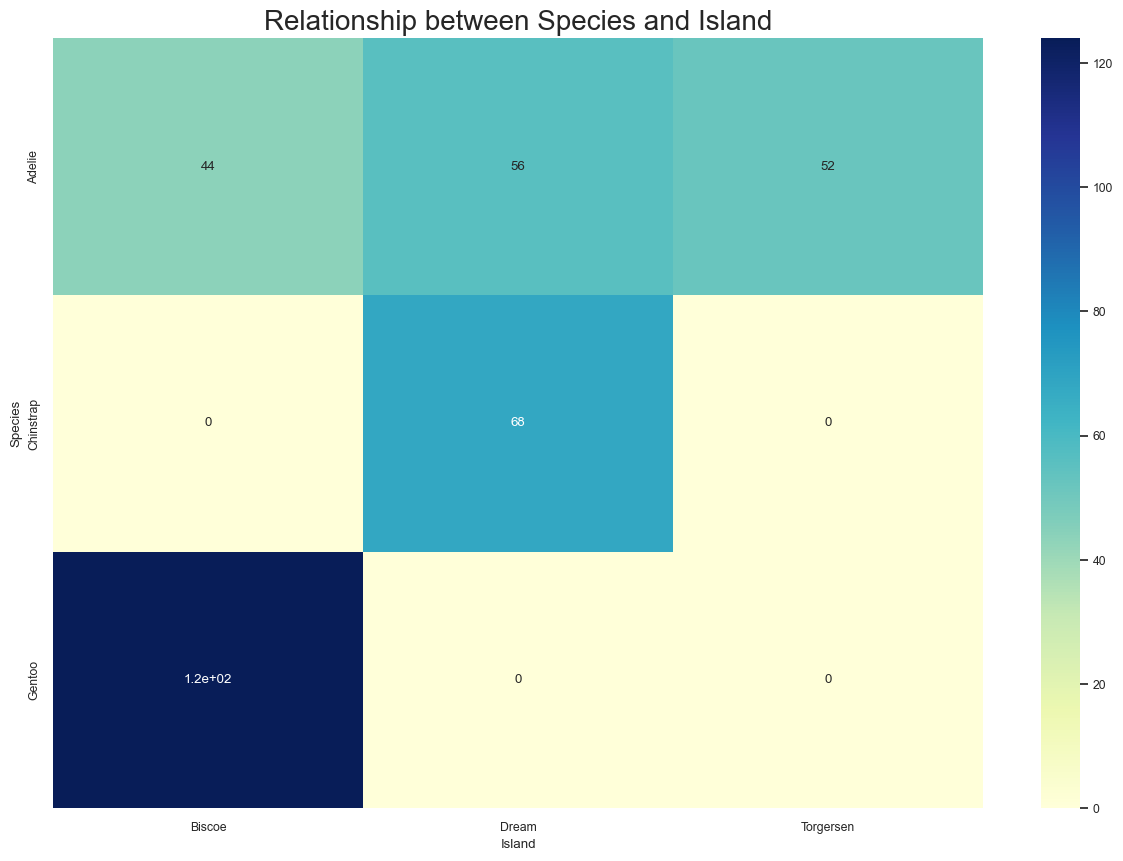

In [1896]:
# Heatmap of contingency table between Species and Island 
plt.figure(figsize = (15,10))
contingency = pd.crosstab(df[target], df['Island'])
sns.heatmap(contingency, cmap='YlGnBu', annot=True) 
plt.title('Relationship between Species and Island', fontsize = 20)
plt.show()

In [1897]:
df

,Species,Island,Clutch Completion,Culmen Length,Culmen Depth,Flipper Length,Body Mass,Delta 15 N,Delta 13 C,Egg Year,Egg Month,Egg Day
0,Adelie,Torgersen,Yes,39.10,18.7,181.0,3750.0,8.733382,-25.686292,2007,11,11
1,Adelie,Torgersen,Yes,39.50,17.4,186.0,3800.0,8.949560,-24.694540,2007,11,11
2,Adelie,Torgersen,Yes,40.30,18.0,195.0,3250.0,8.368210,-25.333020,2007,11,16
3,Adelie,Torgersen,Yes,44.45,17.3,197.0,4050.0,8.733382,-25.686292,2007,11,16
4,Adelie,Torgersen,Yes,36.70,19.3,193.0,3450.0,8.766510,-25.324260,2007,11,16
...,...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,No,44.45,17.3,197.0,4050.0,8.733382,-25.686292,2009,12,1
340,Gentoo,Biscoe,Yes,46.80,14.3,215.0,4850.0,8.411510,-26.138320,2009,11,22
341,Gentoo,Biscoe,Yes,50.40,15.7,222.0,5750.0,8.301660,-26.041170,2009,11,22
342,Gentoo,Biscoe,Yes,45.20,14.8,212.0,5200.0,8.242460,-26.119690,2009,11,22


### Analyse correlation/relationships between Features 

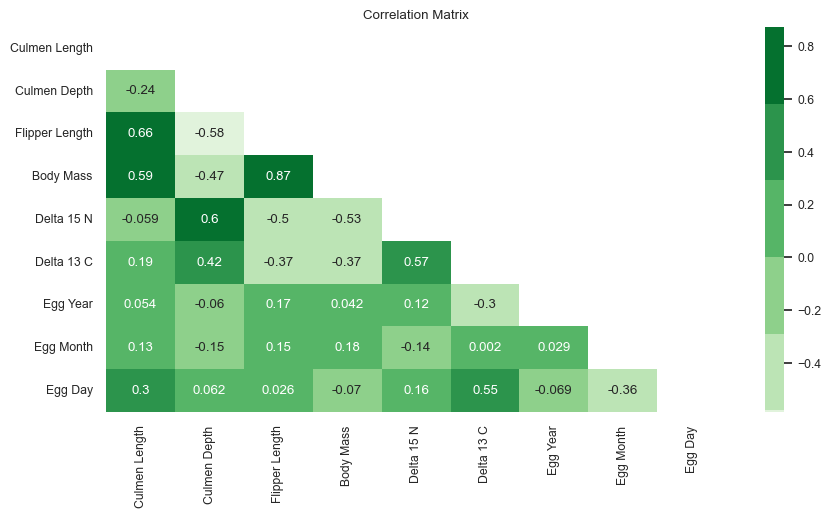

In [1898]:
# Visualising correlation amoungst numerical features (no target)
colormap = sns.color_palette('Greens')
matrix = df.corr()
mask = np.triu(np.ones_like(matrix, dtype = bool))
plt.figure(figsize = (10,5))
sns.heatmap(matrix, mask = mask, cmap=colormap, center=0, annot = True).set(title = 'Correlation Matrix')
plt.show()

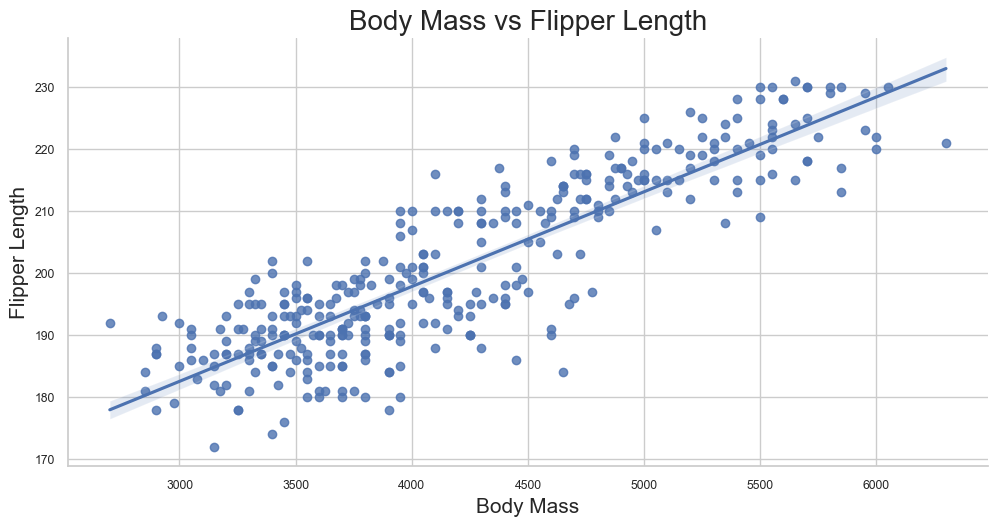

In [1899]:
# Visualising Body Mass and Flipper Length
feat1 = 'Body Mass'
feat2 = 'Flipper Length'
title = f'{feat1} vs {feat2}'

sns.lmplot(df, x = feat1, y = feat2, height=5, aspect = 2)
plt.title(title, fontsize = 20)
plt.xlabel(feat1, fontsize = 15)
plt.ylabel(feat2, fontsize = 15)
plt.show()

In [1900]:
# Removing highly correlated features w features from the dataset 
matrix = abs(round(matrix,2))
cor_matrix = matrix.where(np.triu(np.ones(matrix.shape), k=1).astype(bool))


col_removed = []
for column in cor_matrix.columns:
      if any(cor_matrix[column] >= 0.8):
            col_removed.append(column)
            df.drop(column, axis=1, inplace = True)

print(f'Columns removed: {col_removed}')

Columns removed: ['Body Mass']


## Data Preprocessing

In [1901]:
# One-Hot Encoding the categorical features
label_encoding = df.select_dtypes(['category', 'object'])
label_encoding.drop(target, axis = 1, inplace=True)
df.drop(label_encoding.columns, axis = 1, inplace = True)
label_encoding_join = pd.get_dummies(label_encoding, drop_first=True)
df = pd.concat([df,label_encoding_join], axis = 1)

In [1902]:
# Label Encode the target variable 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df[target] = encoder.fit_transform(df[target])

In [1903]:
# Final Glance at data 
df.head(10)

,Species,Culmen Length,Culmen Depth,Flipper Length,Delta 15 N,Delta 13 C,Egg Year,Egg Month,Egg Day,Island_Dream,Island_Torgersen,Clutch Completion_Yes
0,0,39.10,18.7,181.0,8.733382,-25.686292,2007,11,11,0,1,1
1,0,39.50,17.4,186.0,8.949560,-24.694540,2007,11,11,0,1,1
2,0,40.30,18.0,195.0,8.368210,-25.333020,2007,11,16,0,1,1
3,0,44.45,17.3,197.0,8.733382,-25.686292,2007,11,16,0,1,1
4,0,36.70,19.3,193.0,8.766510,-25.324260,2007,11,16,0,1,1
5,0,39.30,20.6,190.0,8.664960,-25.298050,2007,11,16,0,1,1
6,0,38.90,17.8,181.0,9.187180,-25.217990,2007,11,15,0,1,0
7,0,39.20,19.6,195.0,9.460600,-24.899580,2007,11,15,0,1,0
8,0,34.10,18.1,193.0,8.733382,-25.686292,2007,11,9,0,1,1
9,0,42.00,20.2,190.0,9.133620,-25.093680,2007,11,9,0,1,1


In [1904]:
# Shape of final modelling dataset
df.shape

(344, 12)

## Modelling

In [1950]:
# Splitting data into train and test datasets
from sklearn.model_selection import train_test_split
X = df.drop(target, axis = 1).values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [1982]:
# Scaling the training and test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

array([[0.31272727, 0.48148148, 0.30508475, ..., 1.        , 0.        ,
        1.        ],
       [0.48727273, 0.2345679 , 0.81355932, ..., 0.        , 0.        ,
        1.        ],
       [0.21818182, 0.55555556, 0.25423729, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.72363636, 0.61728395, 0.49152542, ..., 1.        , 0.        ,
        1.        ],
       [0.72363636, 0.9382716 , 0.6440678 , ..., 1.        , 0.        ,
        1.        ],
       [0.52727273, 0.58024691, 0.3559322 , ..., 1.        , 0.        ,
        1.        ]])

In [1952]:
# Designing the Neural Network Architecture and Compiling the model  
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()

# input layer 
model.add(Dense(units = 64, activation = 'relu', input_dim = 11))

# Hideen layers
model.add(Dense(110, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(550, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(110, activation = 'relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy', metrics = ['accuracy'])

print('Here is a summary of the model architecture:')
model.summary()

Here is a summary of the model architecture:
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_71 (Dense)             (None, 110)               7150      
_________________________________________________________________
dropout_42 (Dropout)         (None, 110)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 550)               61050     
_________________________________________________________________
dropout_43 (Dropout)         (None, 550)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 110)               60610     
_________________________________________________________________
dropout_

In [1958]:
# Designing Early Stopping rules 
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'loss', mode = 'min', patience=30)

In [1984]:
X_test.shape

(104, 11)

In [1985]:
# Fitting the model
with tf.device('/GPU:0'): 
      model.fit(X_train, y_train, batch_size = 60, epochs=2000, callbacks=early_stopping)

Epoch 1/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/2000
4/4 [==============================] - 0s 3ms/step - loss: 4.9671e-10 - accuracy: 1.0000
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+0

In [1975]:
# Evauting model performance 
score = model.evaluate(X_test, y_test, batch_size=60, verbose=0)
print(f'{model.metrics_names[0]} = {score[0]} \n{model.metrics_names[1]} = {score[1]}')

loss = 1.3123589042152162e-06 
accuracy = 1.0


In [1979]:
# Predicting a sample/record
print(model.predict(X_train[0:1]))
print(y_train[0:1])

[[5.4024249e-22 2.3756033e-19 1.0000000e+00]]
[[0. 0. 1.]]


### Maybe build input so can predict which penguin it is 